 **Made By :-  Ashu Kumar**

# <center>Bank Marketing Prediction</center>

The goal of this project is to build a prediction model that predict whether a customer will purchase a product or service based on their demographic and behavioral data. Here's a brief description of the columns:

+ age: The age of the person contacted for the marketing campaign.
+ job: The occupation of the person.
+ marital: Marital status of the person (e.g., married, single, divorced).
+ education: The level of education of the person.
+ default: Indicates whether the person has credit in default (e.g., yes or no).
+ balance: The average yearly balance in euros.
+ housing: Indicates whether the person has a housing loan (e.g., yes or no).
+ loan: Indicates whether the person has a personal loan (e.g., yes or no).
+ contact: The type of communication contact (e.g., cellular, telephone).
+ day: The last contact day of the month.
+ month: The last contact month of the year.
+ duration: The duration of the last contact in seconds.
+ campaign: The number of contacts performed during this campaign for the individual.
+ pdays: The number of days since the individual was last contacted (999 means client was not previously contacted).
+ previous: The number of contacts performed before this campaign.
+ poutcome: The outcome of the previous marketing campaign (e.g., success, failure, other).
+ y: The target variable indicating whether the person subscribed to the bank's product or not (e.g., yes or no).

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
df.shape

(45211, 17)

**Conduct an examination of the columns present in the dataset.**

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Conduct an examination of the distinct values present in each column of the dataset.**

In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Conducting an assessment to identify and examine duplicate values within the dataset.**

In [10]:
df.duplicated().sum()

0

## Data Visualization

**Lets visualize all the categorical Values.**

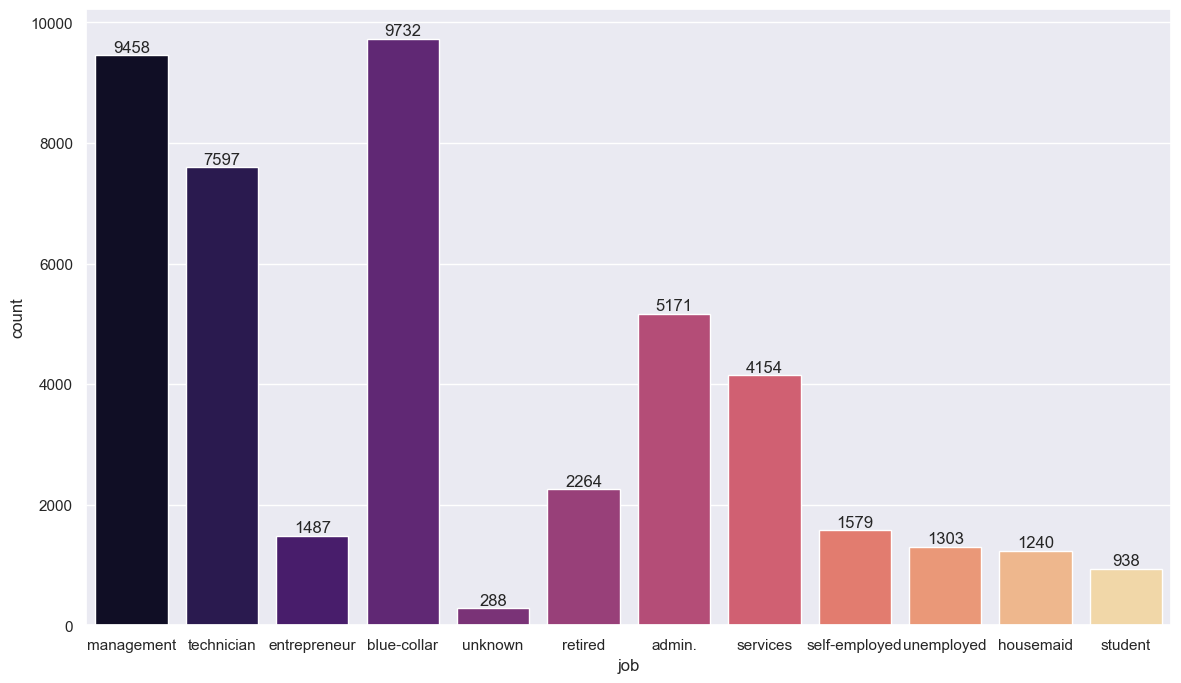

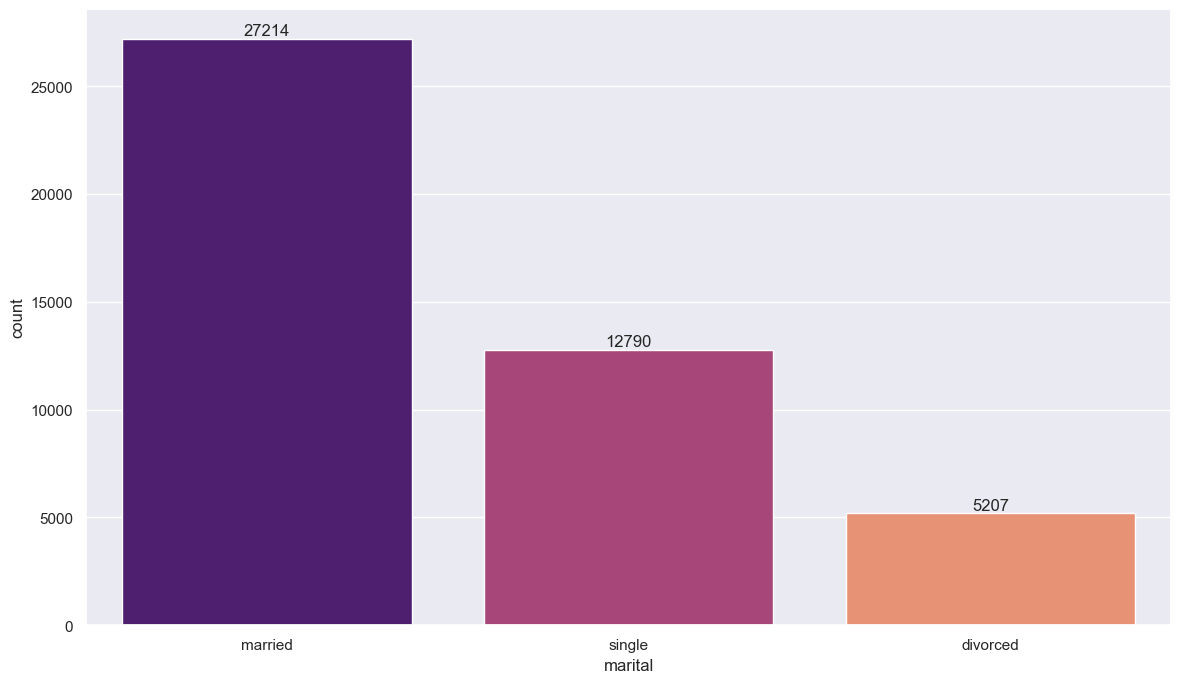

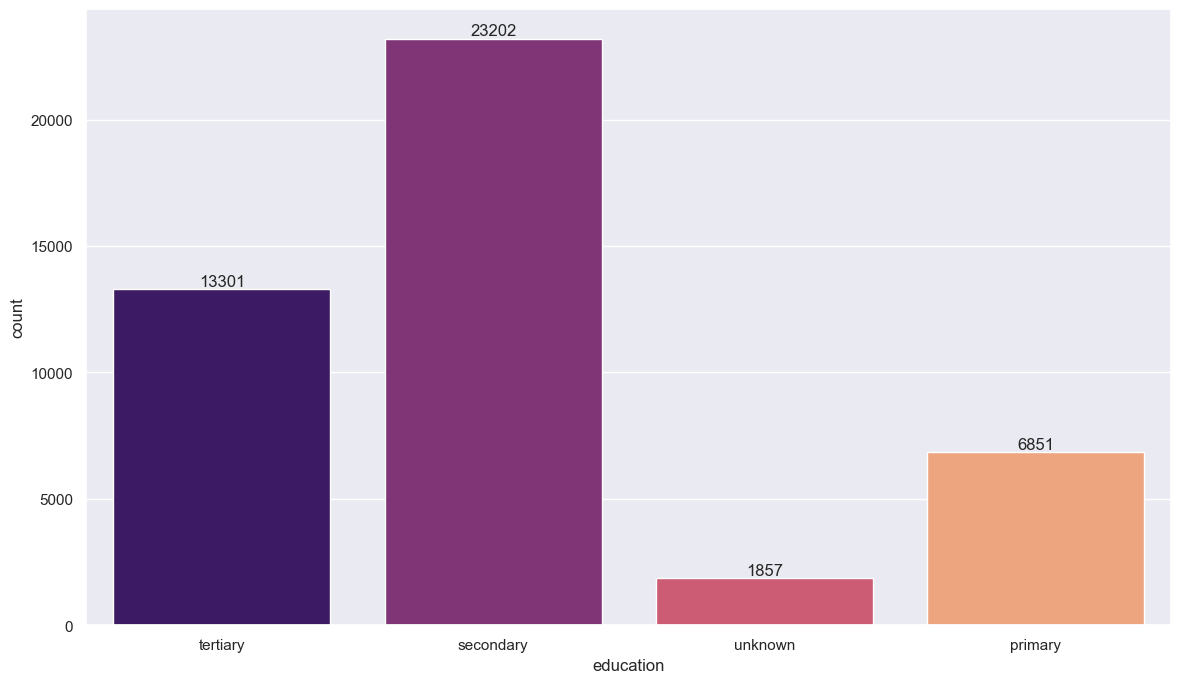

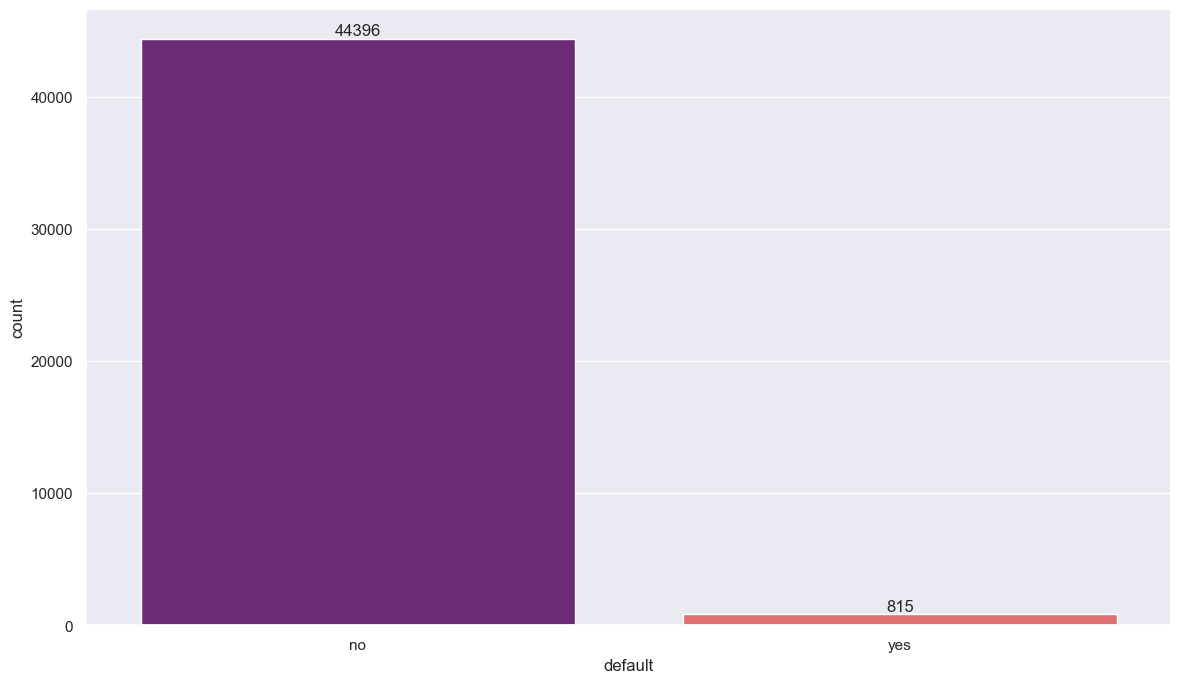

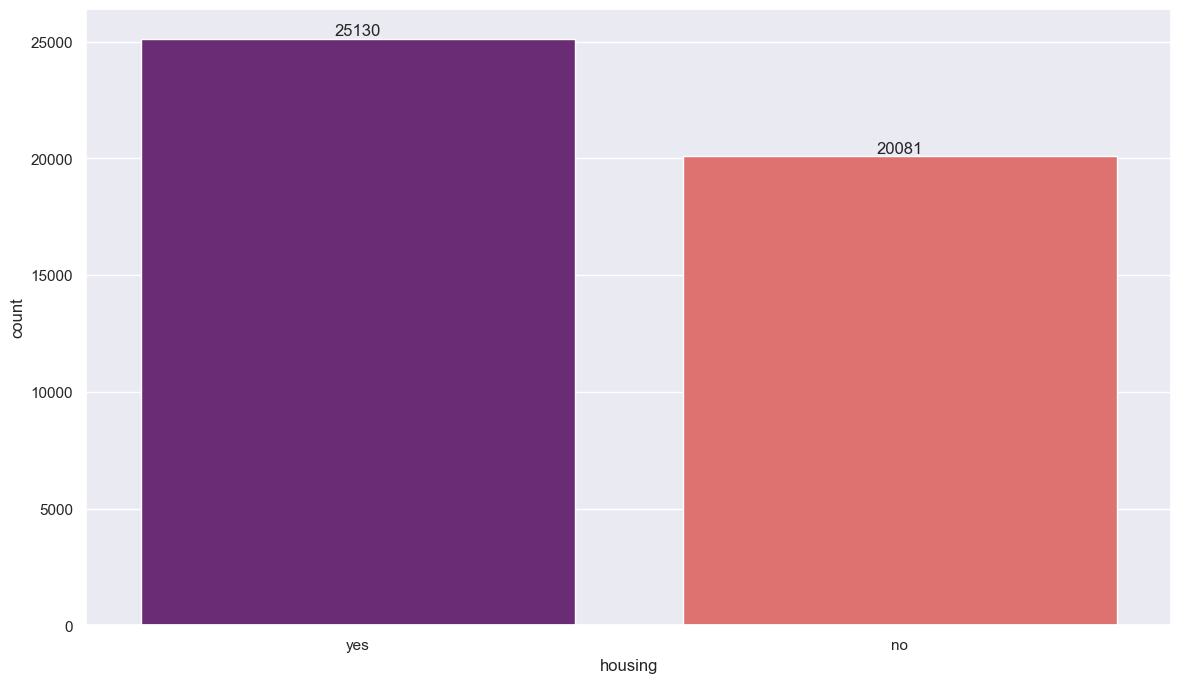

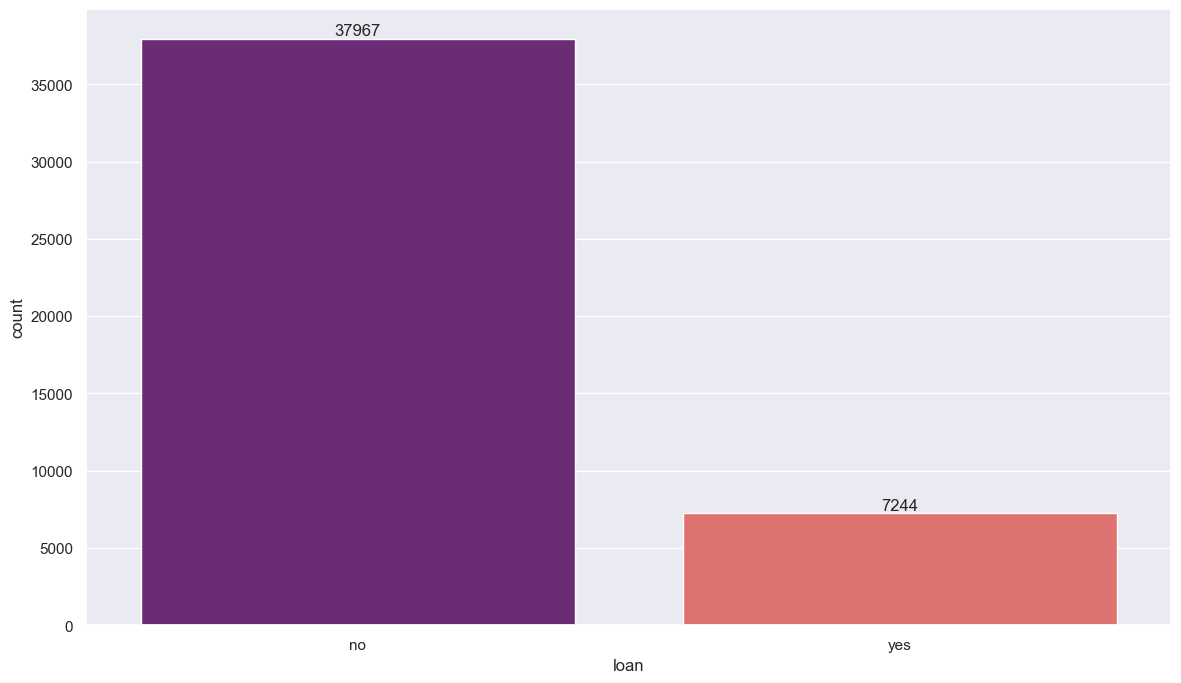

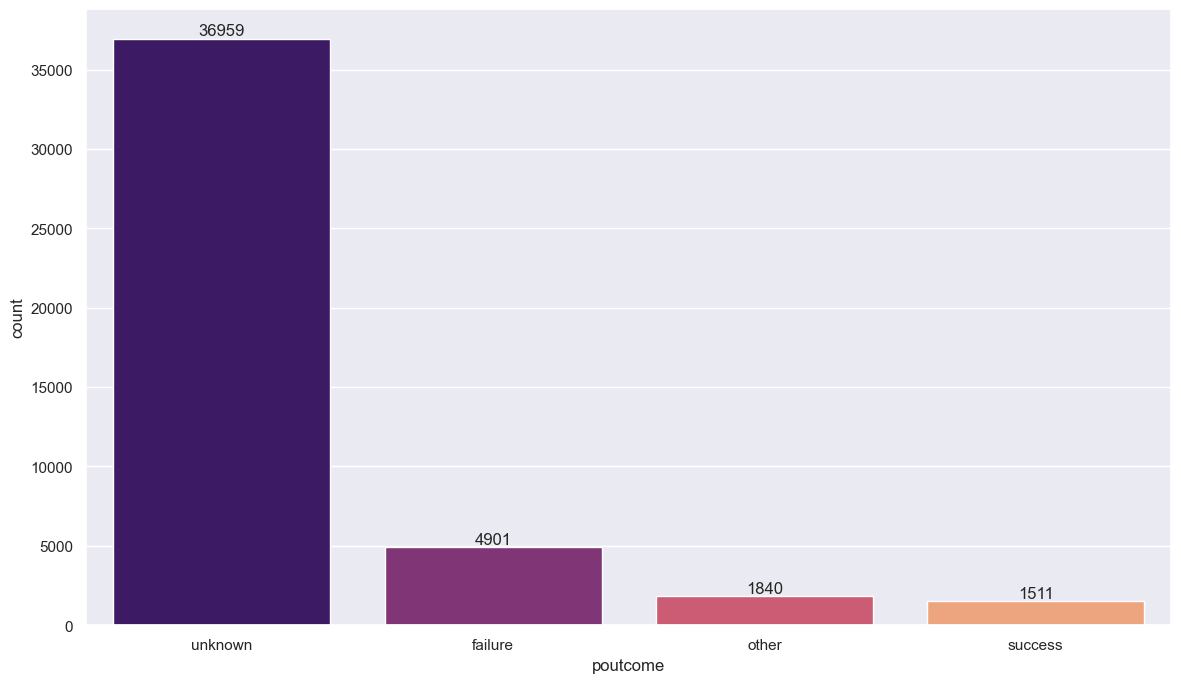

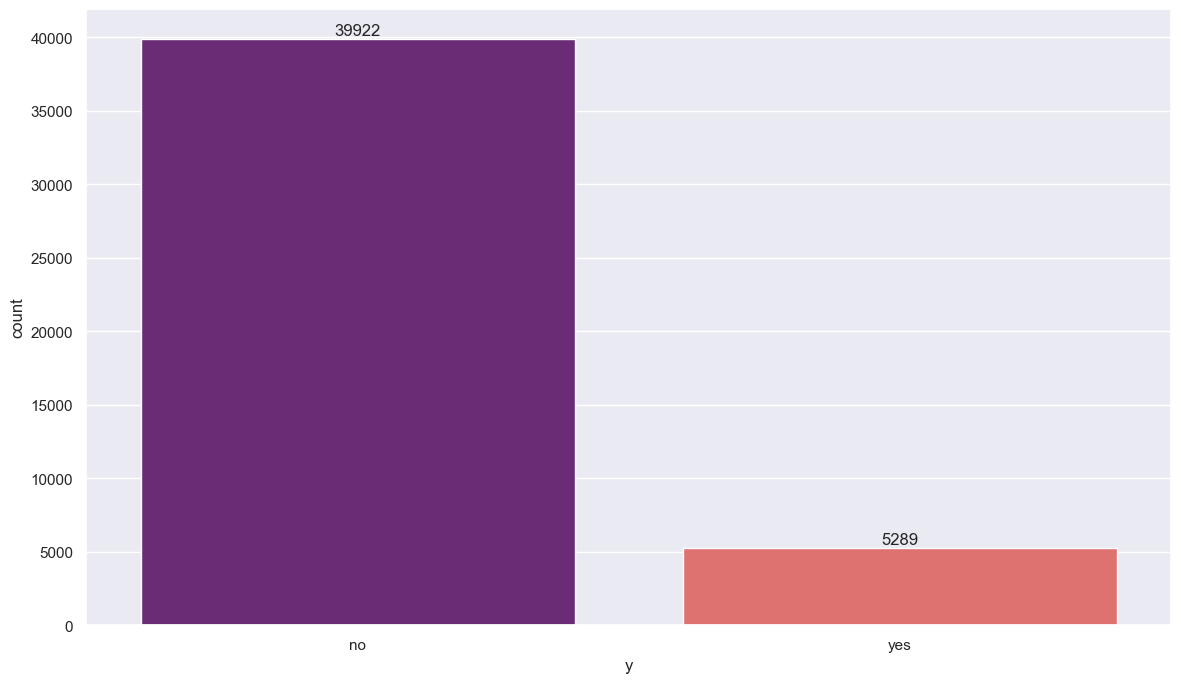

In [11]:
cat_var = ['job','marital','education','default','housing','loan','poutcome','y']
for var in cat_var:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(x=var,data=df,palette='magma')
    ax.bar_label(ax.containers[0])
    plt.show()

**Generate a histplot to visually analyze the count of Aage Variable.**

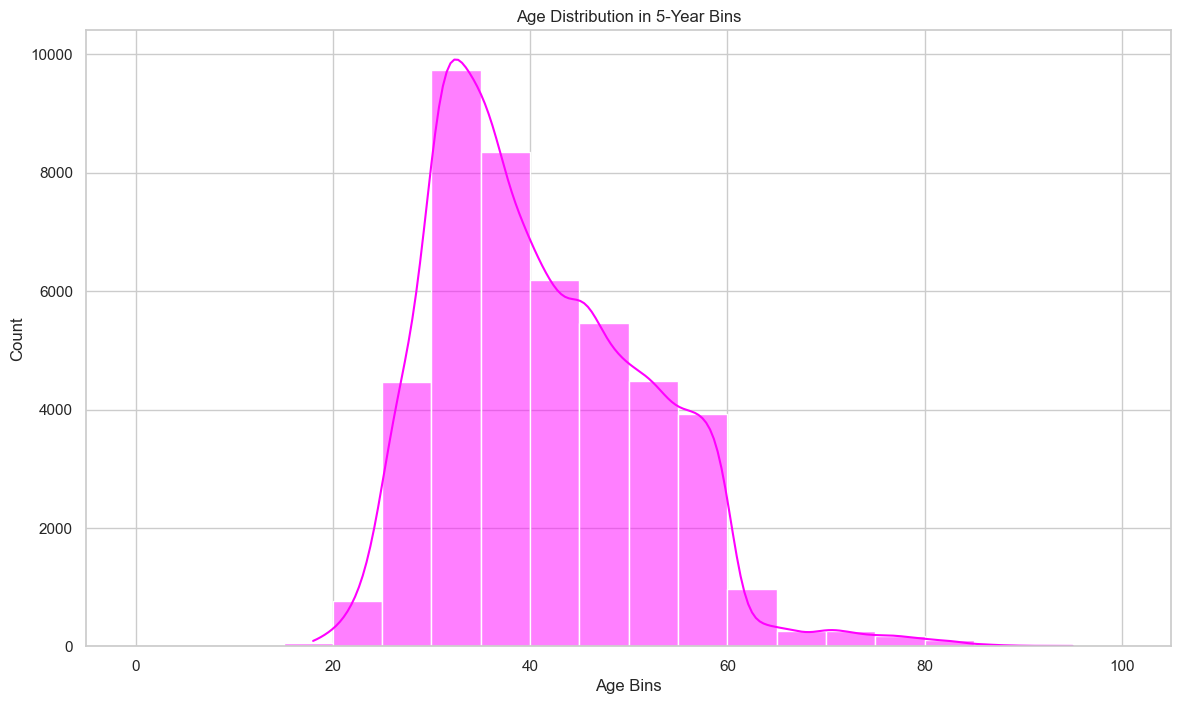

In [12]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.histplot(data=df, x='age', bins=range(0, 101, 5), kde=True, color='magenta')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Age Distribution in 5-Year Bins')
plt.show()

**Convert the categorical variable into numerical variable.**

In [13]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


**Create a Correlation matrix**

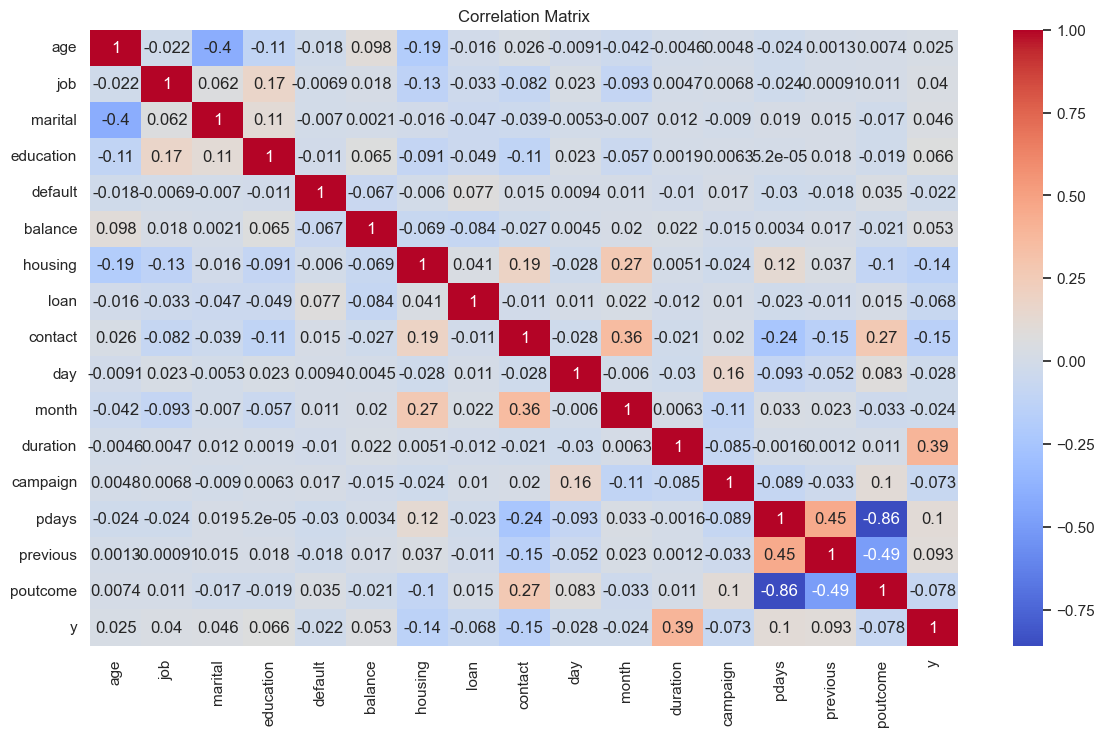

In [14]:
correlation = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Assigning the features as X and target as y and then split the dataset for further modelling**

In [15]:
X = df.drop("y", axis=1)
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a Decision Tree Classifier**

In [16]:
clf = DecisionTreeClassifier(random_state=42)

**Train the classifier**

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make predictions on the test set**

In [18]:
y_pred = clf.predict(X_test)

**Evaluate the model**

In [19]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [20]:
print(f"Accuracy: {accuracy}")
print(classification_rep)

Accuracy: 0.8740462235983634
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

